# HW 9 - Investigating Chaotic systems with python


## Excercise 1

Recall the Holling-Tanner Model of an ecological system

*Plants*  
$\dot{x} = x(1-x) - \frac{a_1x}{1+b_1x}y$  

*Herbivores*  
$\dot{y} = \frac{a_1x}{1+b_1x}y - d_1y-\frac{a_2y}{1+b_2y}z$  

*Carnivores*  
$\dot{z} = \frac{a_2y}{1+b_2y}z - d_2z$


Simulate these equations for at least two sets of initial conditions that are less than 1% apart using the following parameters  
`a1 = 5`  
`b1 = 3`  
`a2 = 0.1`  
`b2 = 2`  
`d1 = 0.4`  
`d2 = 0.01`  

Plot the results as both a time series and trajectories. What eventually happens to the trajectories?

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Plotting the results as a time series

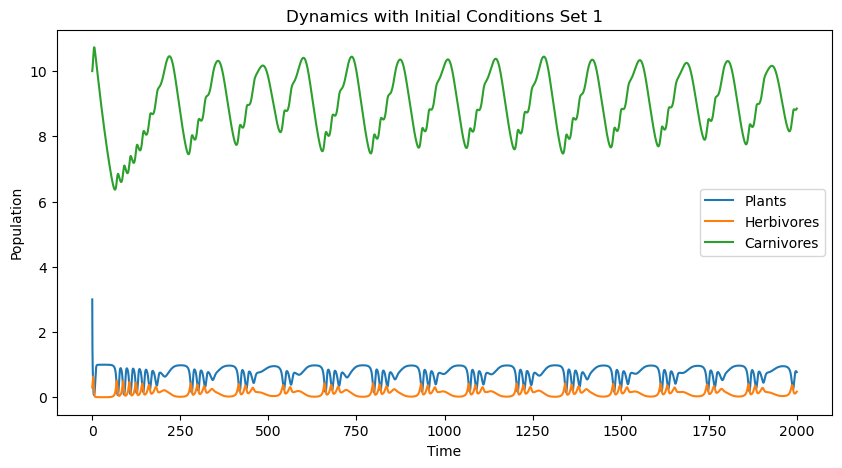

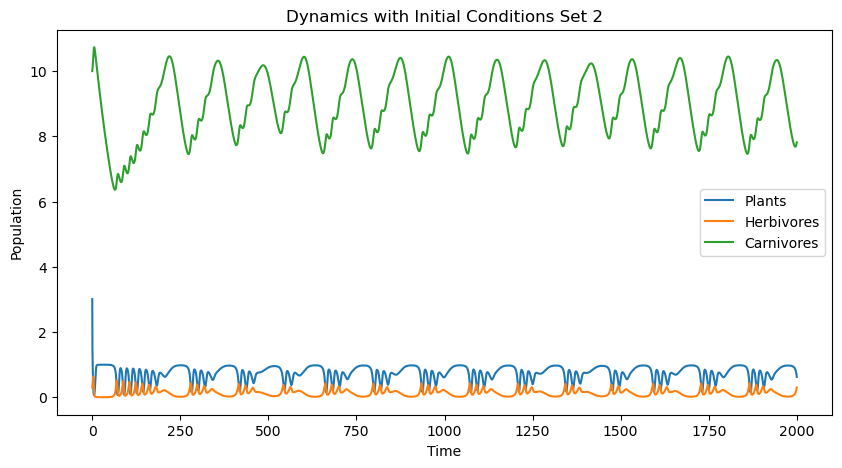

In [45]:
# Define the Holling Tanner function 
def HollingTanner(state, t, a1=5, b1=3, a2=0.1, b2=2, d1=0.4, d2=0.01):
    x, y, z = state  # Unpack the current state
    dxdt = x * (1 - x) - ((a1 * x) / (1 + b1 * x)) * y
    dydt = ((a1 * x) / (1 + b1 * x)) * y - d1 * y - ((a2 * y) / (1 + b2 * y)) * z
    dzdt = ((a2 * y) / (1 + b2 * y)) * z - d2 * z
    return [dxdt, dydt, dzdt]

# Time span for the simulation
t = np.linspace(0, 2000, 100000)

# Create the initial conditions
m0 = np.array([3, 0.3, 10])  # Initial conditions set 1
n0 = np.array([3, 0.3, 10] + 0.01*np.random.random(3))  # Initial conditions set 2

# Simulate the model for both sets of initial conditions
mt = odeint(HollingTanner, m0, t)
nt = odeint(HollingTanner, n0, t)

# Plotting the results for the first set of initial conditions
plt.figure(figsize=(10, 5))
plt.plot(t, mt[:, 0], label='Plants')
plt.plot(t, mt[:, 1], label='Herbivores')
plt.plot(t, mt[:, 2], label='Carnivores')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Dynamics with Initial Conditions Set 1')
plt.show()

# Plotting the results for the second set of initial conditions
plt.figure(figsize=(10, 5))
plt.plot(t, nt[:, 0], label='Plants')
plt.plot(t, nt[:, 1], label='Herbivores')
plt.plot(t, nt[:, 2], label='Carnivores')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Dynamics with Initial Conditions Set 2')
plt.show()

### Plotting the results as trajectories

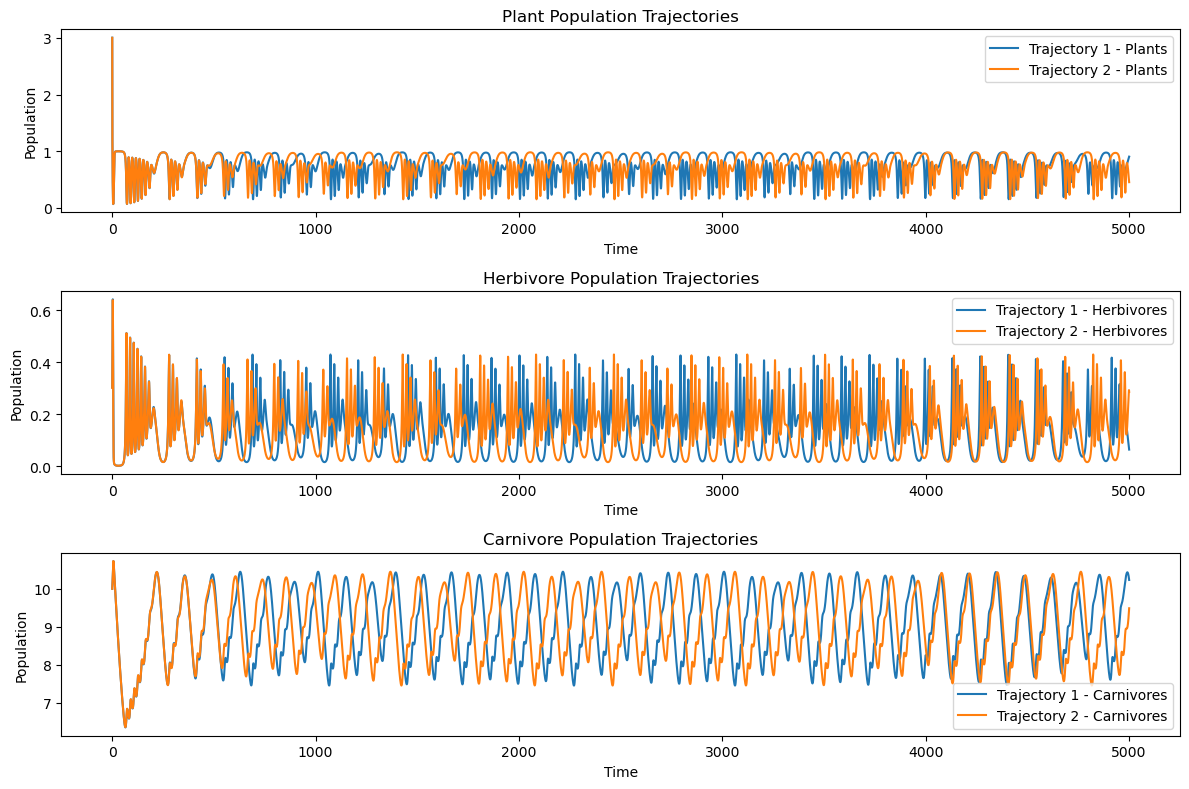

In [47]:
# Create the time space and number of trajectories
t = np.linspace(0, 5000, 100000)
N_trajectories = 2 # 2 trajectories corresponding to m0 and n0

x0 = np.array([3,0.3,10]) + 0.01*np.random.random((N_trajectories, 3))
state = np.asarray([odeint(HollingTanner, x0i, t)
for x0i in x0])

# Create plot for the trajectories for the m0 initial conditions amongst populations
plt.figure(figsize=(12, 8))

# Create plot for plant population trajectories
plt.subplot(3, 1, 1)
plt.plot(t, state[0, :, 0], label='Trajectory 1 - Plants')
plt.plot(t, state[1, :, 0], label='Trajectory 2 - Plants')
plt.legend()
plt.title('Plant Population Trajectories')
plt.xlabel('Time')
plt.ylabel('Population')

# Create plot for herbivore population trajectories
plt.subplot(3, 1, 2)
plt.plot(t, state[0, :, 1], label='Trajectory 1 - Herbivores')
plt.plot(t, state[1, :, 1], label='Trajectory 2 - Herbivores')
plt.legend()
plt.title('Herbivore Population Trajectories')
plt.xlabel('Time')
plt.ylabel('Population')

# Create plot for carnivore population trajectories
plt.subplot(3, 1, 3)
plt.plot(t, state[0, :, 2], label='Trajectory 1 - Carnivores')
plt.plot(t, state[1, :, 2], label='Trajectory 2 - Carnivores')
plt.legend()
plt.title('Carnivore Population Trajectories')
plt.xlabel('Time')
plt.ylabel('Population')

plt.tight_layout()
plt.show()

### The trajectories between the base initial conditions(m0) and the varied initial conditions(n0) remain the same up until roughly the third peak amongst all the populations. This shows the chaotic dynamics we've been discussing as small changes in initial conditions generate vastly different outcomes

## Excercise 2
Recall that the concept of "sensitivity to initial conditions" can be given a precise definition.

Suppose $m_0$ and $n_0$ are two sets of initial conditions for the Holling-Tanner system and $d(m_0,n_0)$ is the distance between those points.

In the Holling-Tanner system $m_0$ and $n_0$ are points in 3-dimensional space, so the distance between them can be calculated using the standard formula for Euclidean distance:

$d(m,n) = \sqrt{(x_m-x_n)^2+(y_m-y_n)^2+(z_m-z_n)^2}$

After time $t$ the points $m_0$ and $n_0$ have been integrated to $m_t$ and $n_t$. Sensitivity dependance says that $d(m_t, n_t)$ grows exponentially with time with different levels of sensitivity being associated with different values of the lyapunov exponentn $\lambda$, such that  

$d(m_t, n_t) = e^{\lambda t}d(m_0,n_0)$  

Approximate the lyapunov exponent for the Holling-Tanner system using the parameters from Excercise 1. Show your work. 

/var/folders/dg/6mxkd92949x2tyn_h6r5tv8c0000gp/T/ipykernel_48326/1255728857.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1000)


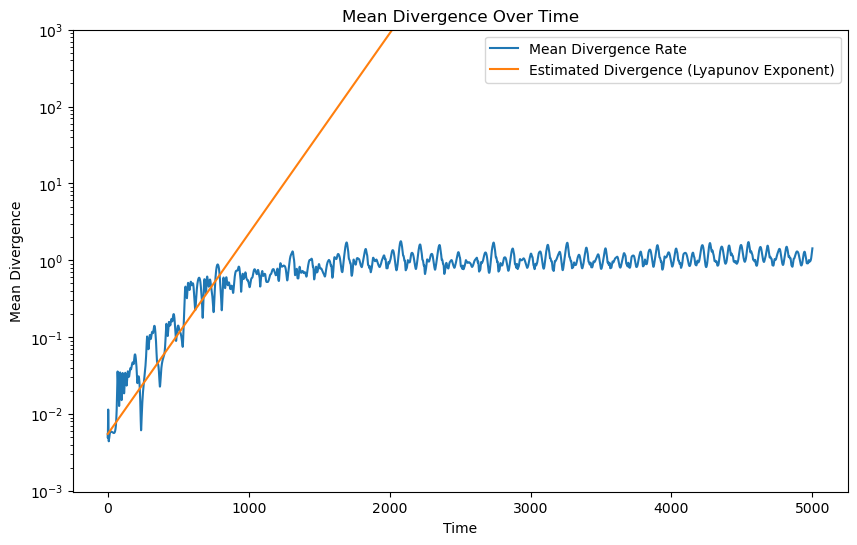

In [54]:
# Create a function that calculates the euclidean distance between the points m0 and n0
def euclidean_dst(m, n):
    return np.sqrt(np.sum((m - n)**2, axis=1))

# Create the initial conditions (initial states)
m0 = np.array([3, 0.3, 10])
n0 = np.array([3, 0.3, 10] + 0.01*np.random.random(3))

# Create the integration for both sets of the initial conditions
mt = odeint(HollingTanner, m0, t)
nt = odeint(HollingTanner, n0, t)

# Now we want to determine the mean divergence rate of the Holling Tanner system to estimate the lypanunov exponen

# Parameters and initial conditions setup
N_trajectories = 100
t = np.linspace(0, 5000, 100000)
state0_base = np.array([3, 0.3, 10])  

# Generate the varied initial conditions for n_trajectories
state0 = state0_base + 0.01 * np.random.random((N_trajectories, 3))

# Integrate the Holling-Tanner model for all trajectories
states = np.array([odeint(HollingTanner, state0i, t)
                   for state0i in state0])

# Compute the distance for each trajectory against the original trajectory
distances = np.array([euclidean_dst(states[0], states[i]) 
                    for i in range(1, N_trajectories)])

# Calculate mean distance at each time point
mean_distances = np.mean(distances, axis=0)

# Plot mean divergence over time
plt.figure(figsize=(10, 6))
plt.semilogy(t, mean_distances, label='Mean Divergence Rate')

# Determine the lyapunov exponent for the semi-log plot of mean divergence (trial and error)
lyapunov = 0.006
D0 = mean_distances[0]
plt.semilogy(t, D0 * np.exp(lyapunov * t), label='Estimated Divergence (Lyapunov Exponent)')

plt.ylim(0, 1000)  
plt.xlabel('Time')
plt.ylabel('Mean Divergence')
plt.title('Mean Divergence Over Time')
plt.legend()
plt.show()

### The lyapunov exponent for the Holling Tanner system is approximately 0.006

## Excercise 3

Plot the Lorenz Map of the herbivores in the Holling-Tanner system using the abovementioned parameters.  

What happens at an Nth peak height of ~0.29? What does it represent?



Text(0.5, 0, 'Nth Z peak height')

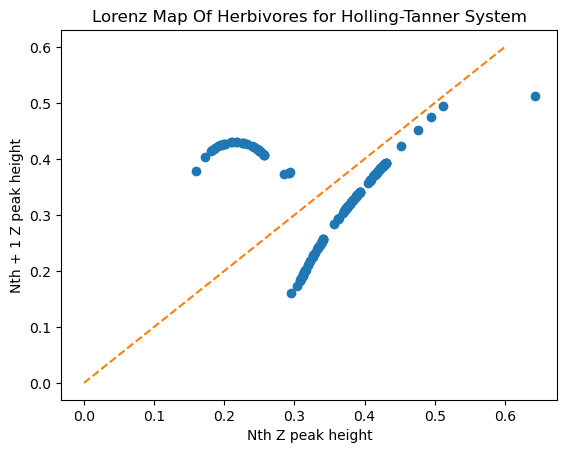

In [61]:
from scipy.signal import find_peaks

# Find peaks of height above 0.2 since we are interested in the relationship of the Nth peak height at ~0.29
z = state[0,:,1]  # Extract the herbivore data
peaks, _ = find_peaks(z, height=0.2)

First_Peak = z[peaks[:-1]]
Second_Peak = z[peaks[1:]]

# Plot the results
plt.plot(First_Peak, Second_Peak, 'o')
plt.plot(np.linspace(0,0.6), np.linspace(0,0.6),'--')
plt.title('Lorenz Map Of Herbivores for Holling-Tanner System')
plt.ylabel('Nth + 1 Z peak height')
plt.xlabel('Nth Z peak height')

### At the Nth peak height ~0.29 there is a sudden drop if the Nth + 1 peak height. This represents a chaotic system in regards to herbivore population levels. This is an example of an unpredictable behavior in the system in response to slightly varied initial conditions

## Excercise 4 (Extra Credit)
Demonstrate and explain why chaos can only occur in a 3D system. 
Show what you would have to do to the FitzHugh Nagumo System to bring it into a chaotic regime.
What are the tradeoffs between for an open system that must be functional (e.g. something in biology) in being almost but not quite chaotic as it approaches a parameter set that gives a lyapunov coefficient greater than 0.

Who did you work with: